In [1]:
%matplotlib inline

import 

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets,svm,metrics,ensemble

In [4]:
digits=datasets.load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

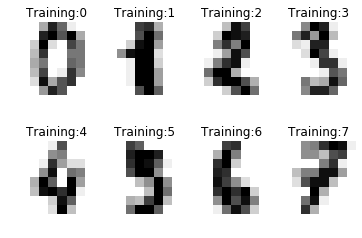

In [6]:
images_and_labels=list(zip(digits.images,digits.target))
for index,(image,label)in enumerate(images_and_labels[:8]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r)
    plt.title('Training:%i'%label)

In [7]:
# digits.images[0]
n_samples=len(digits.images)

In [8]:
data=digits.images.reshape((n_samples,-1))

In [9]:
classifier=svm.SVC(gamma=0.001)
# classifier=ensemble.RandomForestClassifier()

In [10]:
classifier.fit(data[:n_samples//2],digits.target[:n_samples//2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
expected=digits.target[n_samples//2:]
predicted=classifier.predict(data[n_samples//2:])

print('classification report for classifier %s:\n%s\n'
     %(classifier,metrics.classification_report(expected,predicted)))
print("Confusion matrix:\n%s"%metrics.confusion_matrix(expected,predicted))

classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

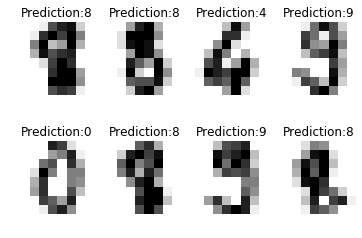

In [12]:
images_and_predictions=list(zip(digits.images[n_samples//2:],predicted))

for index,(images,prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(images,cmap=plt.cm.gray_r)
    plt.title('Prediction:%i' %prediction)
    
plt.show()